## Polinomal Regresyon için veri hazırlama
* **Ön işleme şablonundan bana lazım olan verileri kopyalayıp buraya yapıştırıyorum.**

In [1]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('veriler/maaslar.csv')
veriler

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [5]:
# Burada verilerin içinden "Egitim Seviyesi" kısmını x, "maas" kısmını y olarak böleceğim.

x = veriler.iloc[:,1:2]
y= veriler.iloc[:,2:]
print(x)
y

   Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10


,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


# Liner Regresyon Modelinin Polinomal Veriye Uygulanması

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y) # x'den y'ye öğren dedik.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

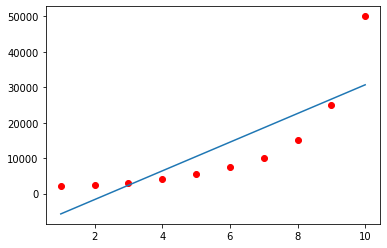

In [8]:
# Bu yaptığımızı görebilmek için görselleştirelim.

plt.scatter(x,y, color="red") # x ve y'ti iki boyutlu uzaya dağıtıyoruz burada
plt.plot(x, lin_reg.predict(x)) # oluşturduğumuz liner modelin "predict" fonksiyonunu kullanarak her bir x'e karşılık gelen tahminleri görselleştiriyoruz.

Görüldüğü gibi bizim verilerimiz polinomal(üssel) olarak artarken, bizim oluşturduğumuz liner regresyon modeli ise doğru şeklinde görülüyor. 

# Polinomal Regresyon'un Veri Setimize Uygulanması

In [10]:
from sklearn.preprocessing import PolynomialFeatures # PolynomialFeatures herhangi bir sayıyı polinomal olarak ifade etmeye yarıyor, istediğimiz polinom derecesini verebiliyoruz.
poly_reg = PolynomialFeatures(degree = 2) # Burada 2'nci dereceden bir PolynomialFeatures objesi oluşturuyorum.

In [11]:
x_poly = poly_reg.fit_transform(x) # x(Egitim Seviyesi)'i polinomal olarak alıyoruz.
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

2'nci sütunda 1'den 10'a kadar giden değerler ve 3'ncü sütunda ise her değerin 2'nci dereceden karşılığı verilmektedir.

<img src="veriler/1.jpg">

bizim buradaki amacımız B0,burada aslında formüldeki ilk 3 kısıma bakarsak X^2, X^1 ve X^0 gelecek. X^0'ın değeri 1'dir her zaman, dolayısıyla B0'ın yanı her zaman 1 olacak. B1 in yanındaki X'imiz 1'den 10'a kadar giden sayılarımız olacak. B1 in yanındaki X'imiz ise 1'den 10'a kadar giden sayılarımızın kareleri olacaktır.

In [13]:
# Doğrusal Regresyon'a sokalım

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y) # Burada x_poly'de oluşturduğumuz değişkenleri kullanarak y'yi öğren, yani x_poly'deki değişkenlerin her birine bir katsayı ver diyoruz. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<img src="veriler/1.jpg">

Yani diyoruz ki, belirlediğim yerdeki X^0, X^1 ve X^2'yi al buradaki B0, B1 ve B2'yi öğren.

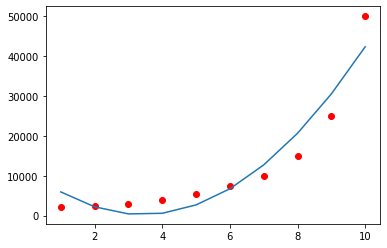

In [15]:
# Şimdi öğrenilen veriyi görselleştirebiliriz.

plt.scatter(x,y, color="red")
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x))) # Burada diyoruz ki: burada bir linear regresyon sonucu çizeceğiz ama bu linear regresyon çizeceğimiz her bir datapoint için x değeri için öncelikle polinomal dönüşünü yap ve ondan sonra çiz. 

oluşturduğumuz liner regresyon modeli 2'nci dereceden bir denklem, dolayısıyla x^2 en büyük terimi ve bu denklem veri noktalarımıza çok daha yakın geçiyor. Bu veriler büyüdükçe daha da yakın olacaktır.
Buradaki en önemli şey Liner Regresyona koymadan önce PolynomialFEatures'a dönüştürmemiz gerekiyor.

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


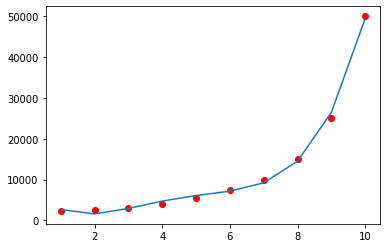

In [20]:
# Burada Polinomun derecesini artıralım ve 4 yapalım.

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)
plt.scatter(x,y, color="red")
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)))

Görüldüğü gibi polinom derecesini artırdığımız için daha iyi sonuç vermiş, buradaki denklemi çok daha iyi yakalamış durumda, tabi bu işlem her veri için aynı sonuçlar verir diyemeyiz.

## Tahminler

In [23]:
pd.read_csv('veriler/maaslar.csv')

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [21]:
# Liner Regresyonda tahmin ettirmek:

print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


* Burada tahmin ettik yani:
* bir kişinin eğitim seviyesi 11 ise: 34716 lira maaş öderim diyoruz.
* bir kişinin eğitim seviyesi 6.6 yani: Müdür ile Direktör arasında bir yerlerde ise 16923 lira para öderim diyoruz.

In [22]:
# Polinomal Regresyonda tahmin ettirmek: yani yeni bir veri, daha önceden öğrenmediği bir veriyi tahmin etmesini istiyoruz.

print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[89041.66666669]]
[[8146.9948718]]


* 11 seviyesi için tahmini 89041 lira, yani diyorki 11'nci seviye olsaydı oradaki kişiye 89041 lira verirdim.
* 6.6 seviyesi için tahmini 8146 lira, yani 6'ncı seviye ve 7'nci seviye arası için de 8146 lira veririm diyor.